# Sect 20 (v2.1): Extensions to Linear Models

- online-ds-pt-100719
- 02/27/2020


## Objectives

**DISCUSSION:**
- Discuss interactions between variables
- Discuss polynomial regressions



**APPLICATION:**
- [Sect 20: Interactions Lab](https://learn.co/tracks/module-2-data-science-career-2-1/statistics-ab-testing-and-linear-regression/section-20-extensions-to-linear-models/interactions-lab)
 

- [Sect 20: Polynomial Regression Lab](https://github.com/learn-co-students/dsc-polynomial-regression-lab-online-ds-pt-100719)

In [2]:
# !pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.7.6 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


['[i] Pandas .iplot() method activated.']


## Topics Covered in Section 20


- Interactions
- Polynomial Regression    
- [Bias-Variance Trade Off](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)



In [55]:
plt.style.use('seaborn-poster')

# Interactions

## What is an interaction?

When variables interact to **cause an effect** to another variable but is **not the sum of their parts**

> "An interaction is a particular property of two or more variables where they interact in a non-additive manner when affecting a third variable" - *Section recap*

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-interaction-terms-online-ds-pt-100719/master/images/new_diet_image.png">


> In our example, the interaction plot was composed out of categorical predictors (countries and diet type), but interactions can occur between categorical variables or between a mix of categorical variables and continuous variables!

### Confounding factor

>This means that the "Country" and "Diet" affect weight loss in a non-additive matter. If we're mostly interested in the effect of diet on weight loss (which seems to be plausible here), we say that "Country" is a **confounding factor** of the effect of "Diet" on weight loss.

![](images/diet_interaction.png)

### Why is important to account for interactions?

- "Not accounting for them might lead to results that are wrong."
- Replacing 2 individual columns with their interaction column can reduce the overall number of features.

- Addressing multicollinearity by creating an interaction variable instead of using the multicollinear ones.


- You'll also notice that including them when they're needed will increase your $R^2$ value!


### When should we use interactions?

- Whenever it can help the model, but not required.
- Can use in hypothesis testing as well (for ANOVAs)

## Using seaborn to view interactions

In [4]:
df = fs.datasets.load_autompg()
display(df.head(),df.dtypes)

[i] Source url with details: https://www.kaggle.com/uciml/autompg-dataset


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

https://blog.insightdatascience.com/data-visualization-in-python-advanced-functionality-in-seaborn-20d217f1a9a6

- `sns.factorplot`
- `sns.FacetGrid`

,Object,Type,Doc
0,add_legend,Method,"Draw a legend, maybe placing it outside axes a..."
1,despine,Method,Remove axis spines from the facets.
2,facet_axis,Method,Make the axis identified by these indices acti...
3,facet_data,Method,Generator for name indices and data subsets fo...
4,map,Method,Apply a plotting function to each facet's subs...
5,map_dataframe,Method,Like ``.map`` but passes args as strings and i...
6,savefig,Method,Save the figure.
7,set,Method,Set attributes on each subplot Axes.
8,set_axis_labels,Method,Set axis labels on the left column and bottom ...
9,set_titles,Method,Draw titles either above each facet or on the ...


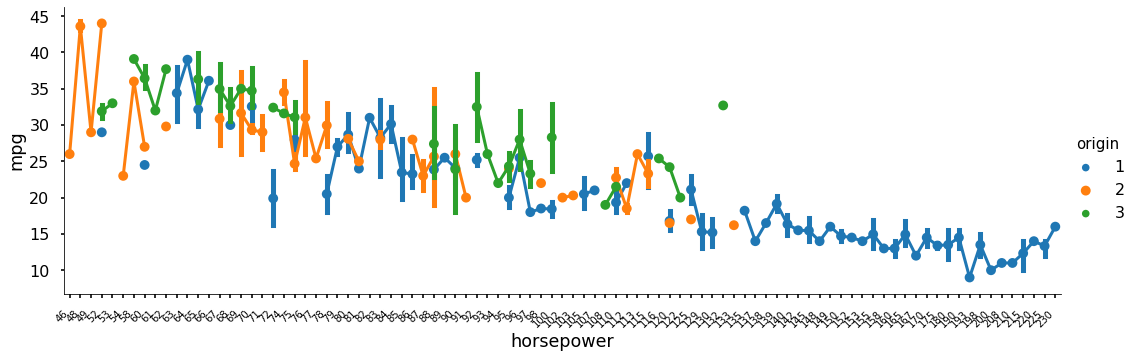

In [49]:
# mpl.rcParams['figure.figsize'] = (10,6)
# fig,ax = plt.subplots()
ffig = sns.catplot(data=df, x='horsepower',y='mpg',
                  hue='origin',kind='point',aspect=3,scale=0.6)
ffig.ax.set_xticklabels(ffig.ax.get_xticklabels(),rotation=45,
                       ha='right',size=10);

display(fs.get_methods_attributes_df(fig))

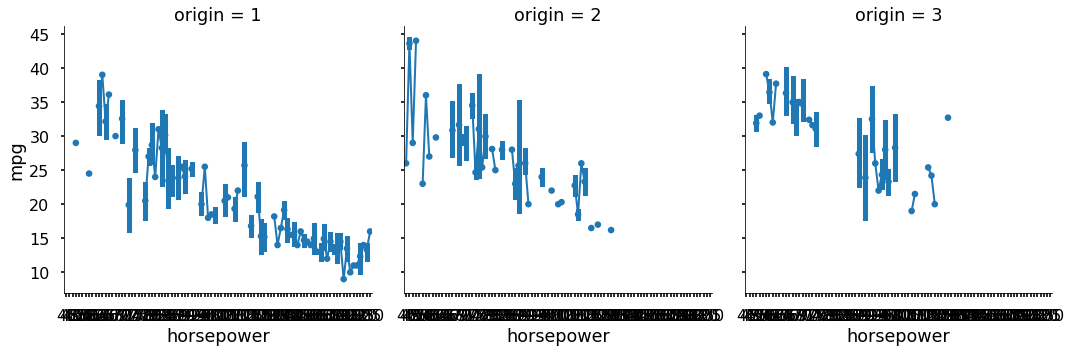

In [51]:
ffig = sns.catplot(data=df, x='horsepower',y='mpg',
                  col='origin',kind='point',scale=0.4)


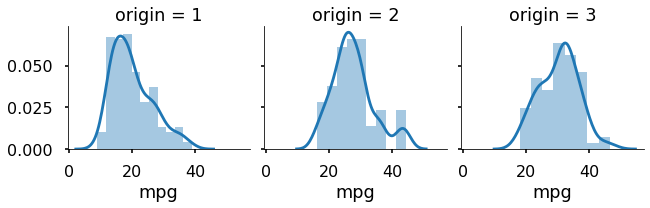

In [52]:
g = sns.FacetGrid(df,col='origin')
g.map(sns.distplot,"mpg")

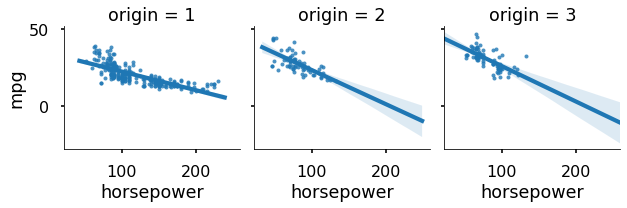

In [54]:
g = sns.FacetGrid(df, col='origin')
g.map(sns.regplot, "horsepower",'mpg',scatter_kws={'s':16})

# Polynomial Regressions

Remember we started with (multiple) linear equation:

$$ \large \hat{y} = w_0 + w_1  x_1 + w_2  x_2 + ... + w_N  x_N $$
$$ \large \hat{y} = \sum_{n=0}^{N} w_n x_n $$


**Knowledge check:** Why is this "linear"?

## Making it more complex!

![](https://github.com/learn-co-students/dsc-2-24-05-polynomial-regression-online-ds-sp-000/raw/master/index_files/index_8_0.png)

Imagine making this (start with just one variable):

$$ \large \hat{y} = \beta_0 + \beta_1  x + \beta_2  x^2 + ... + \beta_N  x^N $$
$$ \large \hat{y} = \sum_{n=0}^{N} \beta_n x^n $$

![](https://github.com/learn-co-students/dsc-2-24-05-polynomial-regression-online-ds-sp-000/raw/master/index_files/index_23_0.png)

![](https://github.com/learn-co-students/dsc-2-24-05-polynomial-regression-online-ds-sp-000/raw/master/index_files/index_28_0.png)

For more general (multiple variables):

$$ \large \hat{y} = \beta_{0,0} + \sum_{i=0}^{N} \beta_{1,i} x_1^i + \sum_{i=0}^{N} \beta_{2,i} x_2^i + ... + \sum_{i=0}^{N} \beta_{M,i} x_M^i$$ 

$$ \large \hat{y} = \sum_{i=0}^{N}\sum_{j=0}^{M} \beta_{j,i} x_j^i $$ 


# Bias-Variance Trade Off

## Underfitting and Overfitting

Let's formalize this:


> *Underfitting* happens when a model cannot learn the training data, nor can it generalize to new data.

The simple linear regression model fitted earlier was an underfit model.

> *Overfitting* happens when a model learns the training data too well. In fact, so well that it is not generalizeable to new data 

## The Bias-Variance Trade Off


Another perspective on this problem of overfitting versus underfitting is the bias-variance tradeoff. 

We can break down our error term (the mean squared error) as the sum of 3 sources of error: 

- *bias*
- *variance*, and
- *irreducible error* 

 

$$ \large \text{MSE} = \text{Bias}(\hat{f}(x))^2 + \text{Var}(\hat{f}(x)) + \sigma^2$$
- The derivation of this can be found [here](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff#Derivation).

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-bias-variance-trade-off-online-ds-pt-100719/master/images/new_bias_variance.png">


- **Bias** arises when wrong assumptions are made when training a model. For example:

    - An interaction effect is missed, 
    - We missed a certain polynomial relationship. 
    
    - Because of this, our algorithm misses the relevant relations between predictors and the target variable.
    - *(Note how this is similar to underfitting!)*


- **Variance** arises  when a model is too sensitive to small fluctuations in the training set. 

    - When variance is high, random noise is modeled instead of the intended outputs. 
    - *(This is overfitting!)*

> **The balance between bias and variance is a trade-off.** We can reduce the variance but then there is a risk of running a bigger bias, and vice versa. 
- Bias is usually associated with low model complexity, variance with high model complexity.
- There is generally a "sweet spot" in-between, compromising between bias and variance.

